<img align="right" src="../img/auvisus.svg" width="100" >


# 1. Import Modules

In [1]:
%load_ext autoreload
%autoreload 2


from detr_models.detr.config import DefaultDETRConfig
from detr_models.data_feeder.coco_feeder import COCOFeeder

import matplotlib.pyplot as plt

import numpy as np
from PIL import Image
from matplotlib import patches

import colorsys
import random

---

# 2. Include Helper Functions for plotting

In [2]:
def add_mask_to_image(image, mask, color, alpha=0.5):
    for c in range(3):
        image[:, :, c] = np.where(
            mask == 1,
            image[:, :, c] * (1 - alpha) + alpha * color[c] * 255,
            image[:, :, c],
        )
    return image

def apply_bbox(ax, bbox, color):
    x1, y1, w, h = bbox
    p = patches.Rectangle(
        (x1, y1),
        w,
        h,
        linewidth=2,
        alpha=0.7,
        linestyle="dashed",
        edgecolor=color,
        facecolor="none",
    )

    ax.add_patch(p)


---

# 3. Specify Parameters and Combine to TrainingConfig (Required)

In [4]:
# Specify storage path
# Points to /tests/data by default, but you should include your own data path to verify the data feeder
storage_path = "../tests/data"

# Specify batch size
batch_size = 2

In [5]:
config = DefaultDETRConfig()

training_config = {
        "storage_path": storage_path,
        "batch_size": batch_size,
    }

----

# 4. Init COCOFeeder

In [6]:
data_feeder = COCOFeeder(
        storage_path=training_config["storage_path"],
        batch_size=training_config["batch_size"],
        num_queries=config.num_queries,
        num_classes=config.num_classes,
        image_width=config.image_width,
        image_height=config.image_height,
    )

---

# 5. Verify Shapes

In [11]:
input_data = next(data_feeder(False))

batch_images = input_data[0]
batch_cls = input_data[1]
batch_bboxs = input_data[2]
obj_indices = input_data[3]
batch_masks = input_data[4]

print("Batch Images: {}".format(batch_images.shape))
print("Batch Target Class Labels: {}".format(batch_cls.shape))
print("Batch Target Bounding Boxes: {}".format(batch_bboxs.shape))
print("Batch Target Masks: {}".format(batch_masks.shape))

Batch Images: (2, 270, 480, 3)
Batch Target Class Labels: (2, 100, 1)
Batch Target Bounding Boxes: (2, 100, 4)
Batch Target Masks: (2, None, None, None)


---

# 6. Plot Image and Targets

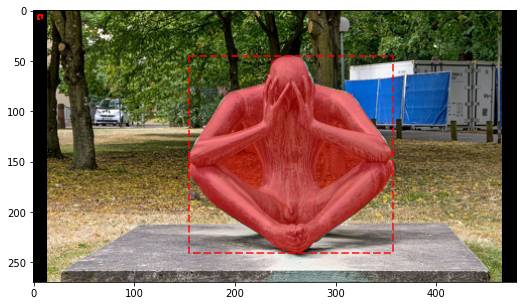

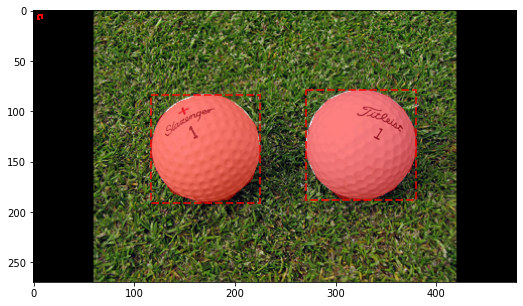

In [13]:
for idx in range(batch_size):
    fig, ax = plt.subplots(figsize=(10, 5))

    sample_image = batch_images[idx]
    sample_masks = batch_masks[idx]
    sample_bboxs = batch_bboxs[idx]

    sample_image = sample_image.numpy().astype(np.uint8)

    color = (1.0, 0.0, 0.0)

    for mask in sample_masks:
        mask = mask.numpy()
        mask = mask.astype(np.uint8)
        sample_image = add_mask_to_image(sample_image, mask, color)

    for bbox in sample_bboxs:
        bbox = bbox.numpy()
        
        if (bbox == config.num_classes + 1).all():
            continue

        apply_bbox(ax, bbox, color)


    ax.imshow(sample_image)
    plt.show()

**Check for multiple pictures via `next(data_feeder(False))` in cell above**

---